# 1.データの概要を確認する

### 必要なインポートの読み込み

In [2]:
import pandas as pd
import numpy as np

### データの読み込み

In [4]:
csv_dir = "/home/jovyan/work/titanic/"

train_df = pd.read_csv(csv_dir + "train.csv")
test_df = pd.read_csv(csv_dir +"test.csv")
submission = pd.read_csv(csv_dir +"gender_submission.csv")

### データ数の確認

In [8]:
import pandas_profiling as pdp
pdp.ProfileReport(train_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print("学習データの数:",train_df.shape)
print("テストデータの数:",test_df.shape)
print("submissionデータの数:",submission.shape)

学習データの数: (891, 12)
テストデータの数: (418, 11)
submissionデータの数: (418, 2)


### データの確認

Survived(生存 1 死亡 0),  
Pclass(チケットの階級 1>2>3),  
Sibsp(乗船している兄弟や配偶者の数),  
Parch(乗船している親や子供の数),  
Ticket(チケット番号),
Fare(チケット料金),  
Cabin(部屋番号),  
Embarked(乗船した港)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 学習データ、テストデータそれぞれの統計量を確認

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### カテゴリ変数の確認

In [10]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### 欠損値の確認

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.データの可視化

### データの可視化に必要なライブラリのインポート

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### 乗船した港ごとの生存率可視化

欠損値除去

In [15]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


EmbarkedとSurvivedの値で集計する

In [16]:
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

横持ちデータに変換してデータフレームに代入

In [17]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

In [18]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot:xlabel='Embarked'>

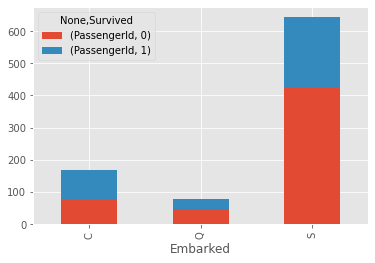

In [19]:
embarked_df.plot.bar(stacked=True)

In [20]:
embarked_df["survived_rate"] = embarked_df.iloc[:,1]/(embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [21]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

### 性別ごとの生存率可視化

In [22]:
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()

In [23]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<AxesSubplot:xlabel='Sex'>

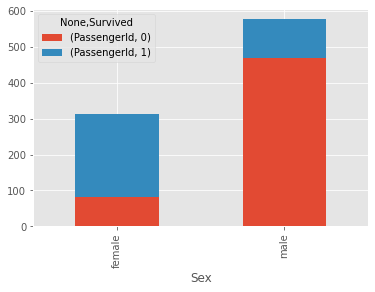

In [24]:
sex_df.plot.bar(stacked=True)

In [25]:
sex_df["survived_rate"] = sex_df.iloc[:,1]/(sex_df.iloc[:,0] + sex_df.iloc[:,1])

In [26]:
sex_df

PassengerId      survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

### チケット階級ごとの生存率可視化

In [27]:
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()

In [28]:
ticket_df

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

<AxesSubplot:xlabel='Pclass'>

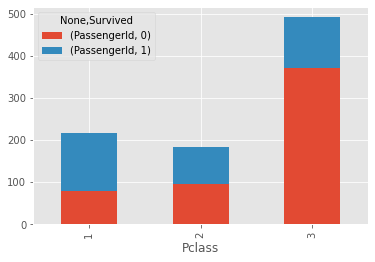

In [29]:
ticket_df.plot.bar(stacked=True)

In [30]:
ticket_df["survived_rate"] = ticket_df.iloc[:,1]/(ticket_df.iloc[:,0] + ticket_df.iloc[:,1])

In [31]:
ticket_df

PassengerId      survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363

### 年代ごとの生存率可視化

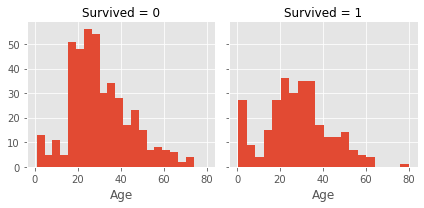

In [32]:
sns.FacetGrid(train_df, col='Survived').map(plt.hist,'Age', bins=20)

### カテゴリ変数をダミー変数化

In [33]:
train_df_corr = pd.get_dummies(train_df,columns=["Sex"],drop_first=True) #女性の値０　→男性なら１と分かるので、dropする
train_df_corr = pd.get_dummies(train_df_corr,columns=["Embarked"])       

In [34]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


### 相関行列の作成

In [35]:
train_corr = train_df_corr.corr()

In [36]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


### ヒートマップでの可視化

<AxesSubplot:>

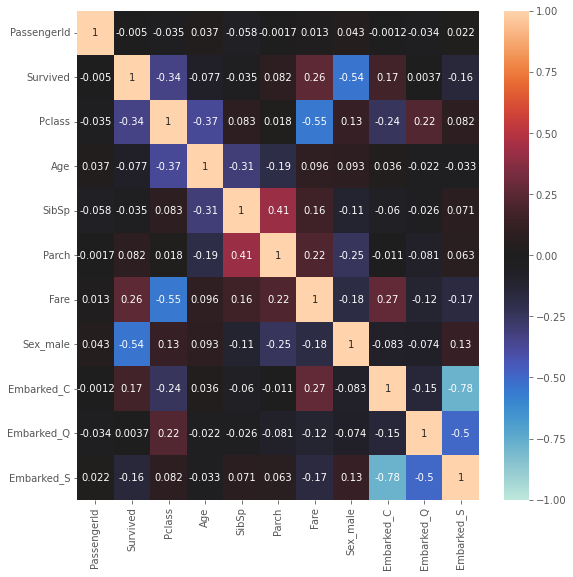

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1,center=0, annot=True)

survivedともっとも相関が高いのは、Sex_male(男性を１としているため、女性のほうが生き残る確率が高いということ)
\２番目は、Pclass(チケットの階級が高いほど生き残る確率が高い)

# 3.前処理、特徴量の生成

### 学習データとテストデータを結合する

In [38]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

In [39]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


欠損値の確認

In [40]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

欠損値補完（Fareにひとつあるため、平均値で埋める）

In [41]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

In [42]:
Fare_mean.columns =["Pclass","Fare_mean"]

In [43]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [44]:
all_df = pd.merge(all_df,Fare_mean,on = "Pclass",how = "left")
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean",axis=1)

### Nameの敬称に注目する

In [45]:
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

敬称を変数として追加する

In [46]:
name_df = all_df["Name"].str.split("[,.]",2,expand = True)

In [47]:
name_df.columns = ["family_name","honorific","name"]

In [48]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


空白文字の削除

In [49]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

人数のカウント

In [50]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

敬称ごとの年齢分布を確認する

In [51]:
all_df = pd.concat([all_df,name_df],axis=1)

In [52]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot:xlabel='honorific', ylabel='Age'>

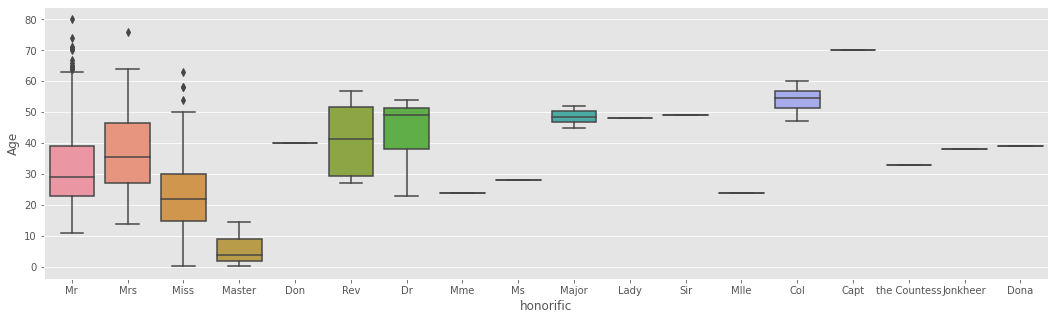

In [53]:
plt.figure(figsize=(18,5))
sns.boxplot(x="honorific", y="Age", data=all_df)

敬称ごとの年齢の平均値

In [54]:
all_df[["honorific","Age"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


敬称ごとの生存率の違い

In [55]:
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)],axis=1)

<AxesSubplot:xlabel='honorific'>

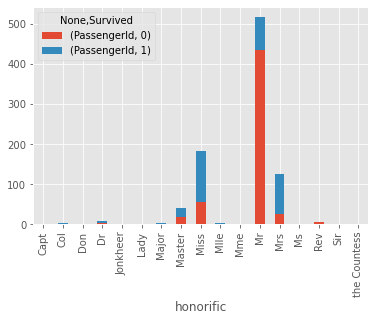

In [56]:
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

欠損値を平均値で補完

In [57]:
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()#honorificごとの平均値を算出
honorific_age_mean.columns = ["honorific","honorific_Age"]#カラム名をつける
all_df = pd.merge(all_df,honorific_age_mean,on="honorific",how="left")#全データにhonorificの平均値列を結合させる
all_df.loc[(all_df["Age"].isnull(),"Age")] = all_df["honorific_Age"]#欠損値のある行に平均値を入れる
all_df = all_df.drop(["honorific_Age"],axis=1)#平均値欄は削除

### 家族人数を追加する

In [58]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [59]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0


In [60]:
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [61]:
#family_numが0なら、aloneに1を入れる
all_df.loc[all_df["family_num"] == 0, "alone"] =1
#欠損値を０で補完
all_df["alone"].fillna(0, inplace=True)

### 不要な変数を削除する

In [62]:
all_df = all_df.drop(["PassengerId","Name","family_name","Ticket","Cabin"],axis=1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,name,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Owen Harris,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Laina,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,William Henry,0,1.0


### カテゴリ変数を数値に変換する

**カテゴリ変数を確認**

In [63]:
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['Sex', 'Embarked', 'honorific', 'name'], dtype='object')

### 敬称
Mr,Miss,Mrs,Master以外はotherとする

In [64]:
all_df.loc[~((all_df["honorific"] == "Mr") |\
    (all_df["honorific"] == "Miss") |\
    (all_df["honorific"] == "Mrs") |\
    (all_df["honorific"] == "Master")),"honorific"]= "other"

In [65]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

### Sex, Embarked, honorific をLabelEncordingする

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
all_df["Embarked"].fillna("missing",inplace=True)  # 欠損値を含む場合、missingで置き換え

In [68]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,name,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Owen Harris,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Laina,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,William Henry,0,1.0


In [69]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific
name


In [70]:
all_df.dtypes

Survived      float64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
honorific       int64
name            int64
family_num      int64
alone         float64
dtype: object

すべてのデータを学習データとテストデータに戻す

In [71]:
# Syrvivedの値がnull（欠損）ではないものをtrain,そうでないものをtestとする

train_X = all_df[ ~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

# 4.モデリングを行う

### LightGBMのライブラリをインストールする

In [72]:
import lightgbm as lgb

ホールドアウト、クロスバリテーションを用いて検証データ、学習データを分割する

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

学習データの20%を検証データに分割する

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2,random_state = 123)

LightGBM用のデータセットを作成する

In [75]:
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]

*データセット作成*

In [76]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

ハイパーパラメータを設定する

In [77]:
lgbm_params = {
    "objective":"binary" , #二値分類
    "random_seed":1234
}

*機械学習モデルの学習*

In [78]:
model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                         valid_sets = lgb_eval,
                         num_boost_round=100,     #学習回数の指定（ベストスコアから何回か）
                         early_stopping_rounds=20,#何回で学習ストップするか
                         verbose_eval=10)         #学習結果の表示頻度

[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lig

各変数の重要度を調べる

In [79]:
model_lgb.feature_importance()

array([ 65,  29, 326,  17,  10, 323,  39,  17, 378,  34,   7], dtype=int32)

もとのデータのカラム名を表示

<AxesSubplot:>

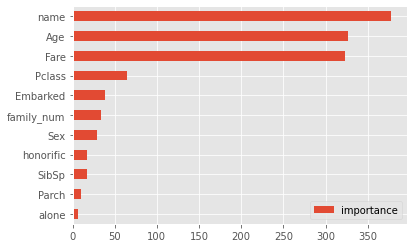

In [81]:
importance = pd.DataFrame(model_lgb.feature_importance(), index = X_train.columns, \
columns = ["importance"]).sort_values(by = "importance",ascending = True)
importance.plot.barh()

## 検証データで予測精度を確認

*モデルを検証データに適用する*

In [91]:
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

### accuracyを計算するライブラリをインポートする

In [92]:
from sklearn.metrics import accuracy_score

*精度の計算*

In [93]:
accuracy_score(y_valid, np.round(y_pred))  #この精度を基準として改善していく

0.8715083798882681

ハイパーパラメータを変更する

In [94]:
lgbm_params = {
    "objective":"binary" ,  # 二値分類
    "max_bin":331,  # 一つの分岐に入るデータ数の最大値
    "num_leaves":20,  # 一つの木に含まれる葉の最大数
    "min_data_in_leaf":57,  # 決定技中における一つの葉における最小のデータ数
    "random_seed":1234
}

*データセット作成*

In [95]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

*機械学習モデルの学習*

In [96]:
model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                         valid_sets = lgb_eval,
                         num_boost_round=100,     #学習回数の指定（ベストスコアから何回か）
                         early_stopping_rounds=20,#何回で学習ストップするか
                         verbose_eval=10)         #学習結果の表示頻度

[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/lig

*モデルを検証データに適用する*

In [97]:
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

*精度の計算*

In [98]:
accuracy_score(y_valid, np.round(y_pred))

0.8715083798882681

## クロスバリテーションによる学習

３分割する

In [99]:
folds = 3

kf = KFold(n_splits=folds)